In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# Load various imports 
from datetime import datetime
from os import listdir
from os.path import isfile, join

import librosa
import librosa.display

import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

#Import stuff

import numpy as np
import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline

In [1]:
import numpy as np
def manipulate(data, noise_factor):
    noise = np.random.randn(len(data))
    augmented_data = data + noise_factor * noise
    # Cast back to same data type
    augmented_data = augmented_data.astype(type(data[0]))
    return augmented_data

In [5]:
def load_audio_file(file_path):
    input_length = 44100*5
    data = librosa.core.load(file_path,sr=44100)[0] #, sr=16000
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
    return data
def plot_time_series(data):
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 5, len(data)), data)
    plt.show()

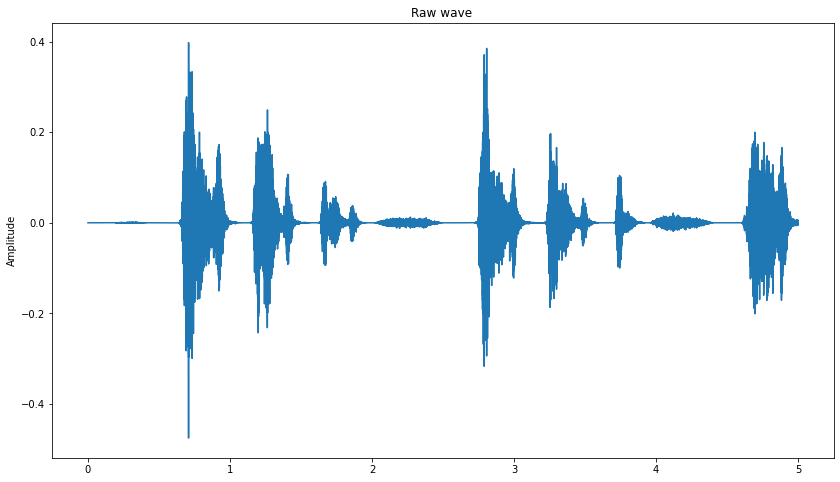

In [18]:
data = load_audio_file("/content/drive/My Drive/cough_data/pos_cough/05acPS4aRGfvuOfku11Za8zve8i2cough-heavy.wav")
plot_time_series(data)

In [19]:
#Hear it ! 
ipd.Audio(data, rate=44100)

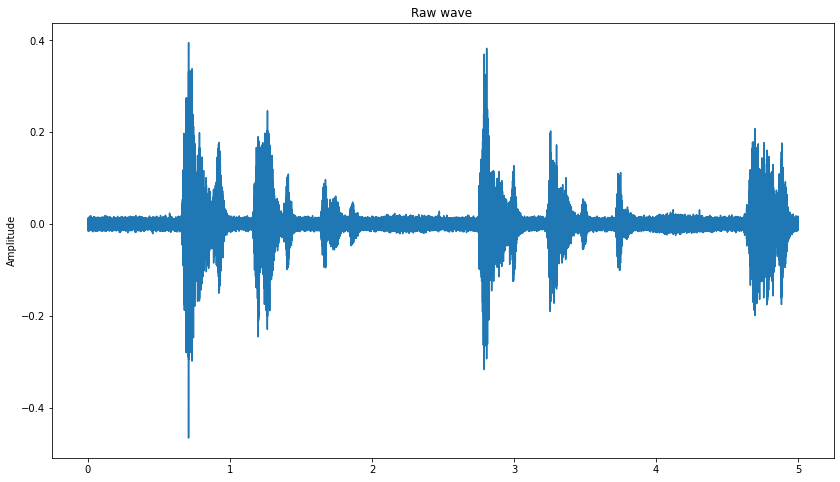

In [21]:
#White noise 추가

# Adding white noise 
wn = np.random.randn(len(data))
data_wn = data + 0.005*wn
plot_time_series(data_wn)
# We limited the amplitude of the noise so we can still hear the word even with the noise, 
#which is the objective
ipd.Audio(data_wn, rate=44100)

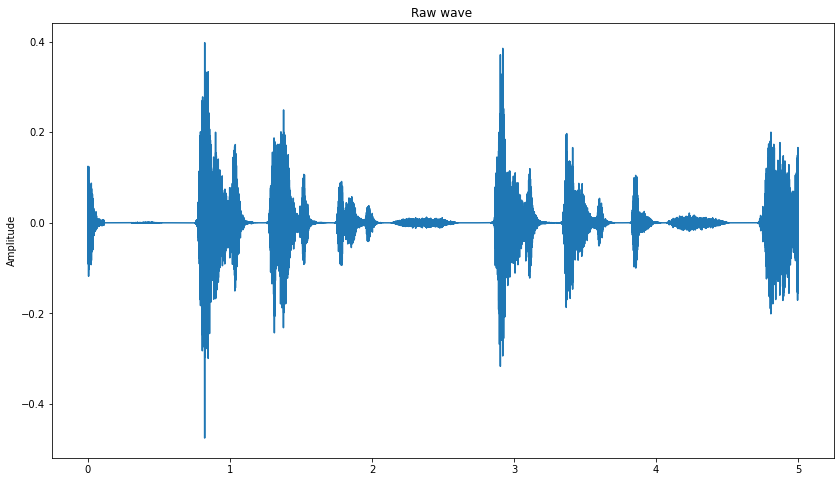

In [22]:
# Shifting the sound
data_roll = np.roll(data, 5000)
plot_time_series(data_roll)
ipd.Audio(data_roll, rate=44100)

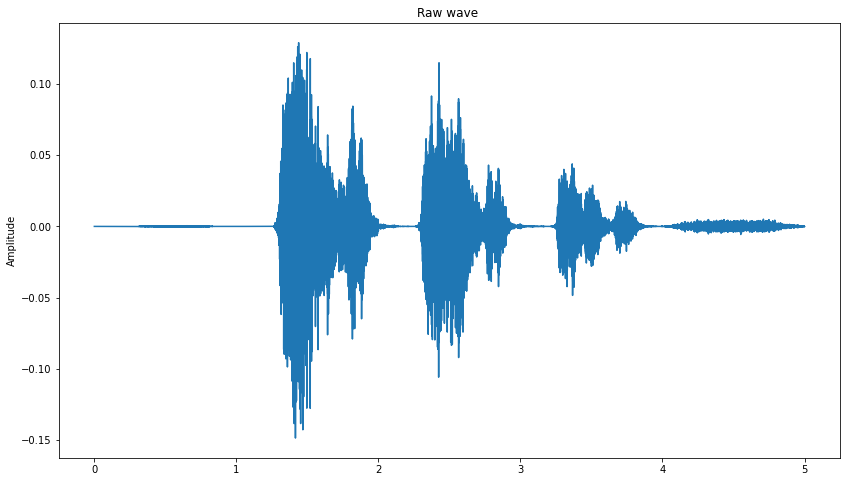

In [24]:
# 늘어지도록
def stretch(data, rate=1):
    input_length = 44100*5
    data = librosa.effects.time_stretch(data, rate)
    if len(data)>input_length:
        data = data[:input_length]
    else:
        data = np.pad(data, (0, max(0, input_length - len(data))), "constant")

    return data


data_stretch =stretch(data, 0.5)
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=44100)

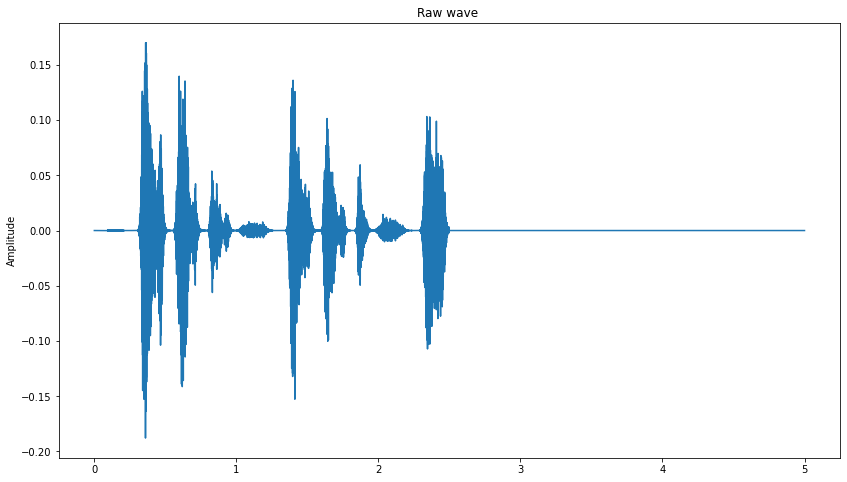

In [26]:
#빨라지도록

data_stretch =stretch(data, 2.0)
plot_time_series(data_stretch)
ipd.Audio(data_stretch, rate=44100)